## AI-Driven Optimal Placement of Electric Vehicles Charging Stations in Kenya

### Business Understanding 

#### Backgound Information & Overview

Kenya is undergoing a transportation and energy transformation, with electric vehicle (EV) adoption increasing due to rising fuel costs, government incentives, and a global push for sustainability efforts. However, the absence of a data-driven approach to charging station placement is slowing down EV adoption. Currently, charging station deployment is largely arbitrary, reactive, or limited to a few locations, leading to underutilization, range anxiety, and inefficient infrastructure investment.

#### Problem Statement

The adoption of electric vehicles (EVs) in Kenya is increasing, but the absence of a well-planned, optimized EV charging infrastructure remains a major barrier to widespread adoption. Current charging stations are placed without data-driven insights, leading to low utilization rates, inconvenient locations, and poor return on investment for operators.

* current number EV charging stations
* 

#### Proposed Solution

By integrating machine learning, geospatial analytics, and optimization models, this AI-driven platform will revolutionize EV infrastructure planning in Kenya. The solution ensures that charging stations are placed where they are most needed, cost-effective, and energy-efficient, paving the way for a sustainable and profitable EV ecosystem.

* Using K-Means Clustering, DBSCAN, and Hierarchical Clustering to help map out the best possible station locations based on geography and infrastructure constraints.
* Use Graph-based Routing and Dijkstra’s Algorithm to ensure stations are placed within an optimal travel distance for EV users. For example ensuring no driver needs to travel more than 5 km to find a charging station.
* Use Random Forest Regression, XGBoost, and Gradient Boosting Machines (GBM) to identify the key drivers of charging station demand based on traffic volume, population density, nearby commercial hubs, weather conditions and charging station accessibility.

#### Objectives

This project seeks to solve this by developing an AI-powered platform that leverages machine learning, geospatial data, and predictive analytics to identify optimal locations for EV charging stations.

The platform will enable:

* EV charging network planners to maximize utilization and profitability by selecting high-demand locations.
* Government agencies to accelerate green mobility initiatives through data-backed decision-making.
* Investors to make informed funding decisions, ensuring high ROI.
* EV users to access conveniently located charging stations, improving the overall user experience.

#### Metrics of Success

1. The model should correctly predict at least 90% of high-demand locations, minimizing false positives and negatives when identifying optimal sites. 
2. The model should achieve an R² score of at least 0.85, ensuring strong correlation between predicted and actual charging demand.
3. At least 80% of the suggested locations should be within 500 meters of a power grid connection, ensuring practical deployment feasibility.
4. The model should maintain an accuracy above 85% when tested on new urban areas, ensuring adaptability as Nairobi’s EV market grows.





### Data Understanding

The data is sourced from the U.S. Department of Transportation, Bureau of Transportation Statistics, about Electric Vehicle Public Charging Stations in the United States as of January 2020. Link - https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore

### Importin the Relevant Libraries

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import Functions as Mf
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [57]:
import pandas as pd

#Alternative_Fueling_Stations.csv

# Load the first sheet into a DataFrame
df = pd.read_csv('Alternative_Fueling_Stations.csv')

# Display the first few rows to understand the structure
df.head()


C:\Users\Damaris\AppData\Local\Temp\ipykernel_10088\199429728.py:6: DtypeWarning: Columns (0,13,15,29,32,34,35,38,43,47,52,53,54,56,57,60,61,62,63,64,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alternative_Fueling_Stations.csv')


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [58]:
df.shape

(97882, 80)

The dataset contains information about alternative fueling stations, including EV charging stations. Key columns relevant for EV Charging Station Placement Analysis include:

* access_code – Whether the station is public or private.
* access_days_time – Availability (e.g., 24-hour access).
* fuel_type_code – Identifies the fuel type (e.g., EV for Electric Vehicles).
* groups_with_access_code – Specifies access permissions.
* ev_pricing_fr – Pricing model for EV charging.
* ev_network_ids_station – Identifies the charging network.
* x, y – Longitude and Latitude coordinates of the station (for mapping).
* federal_agency_name – Indicates government or private ownership.

In [59]:
df['fuel_type_code'].value_counts()

fuel_type_code
ELEC    85398
E85      4719
LPG      2865
BD       1793
RD       1519
CNG      1372
LNG       112
HY        103
Name: count, dtype: int64

* From the above value_counts of the fuel_type_code, we are interested in the electrical vehicles. We proceed to filtering the dataframe for the 'ELEC' fuel_type_code.
* Some of the features are irrelevant to our analysis; First, determine the features of interest in the analysis and filter the dataframe accordingly.

In [60]:
df_elec = df[df['fuel_type_code'] == 'ELEC']
df_elec

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
125,126,private,Fleet use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1517.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,NaN,NaN,1/10/2023 12:00:00 AM,NaN,ELEC,Public,1523.0,...,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
127,128,private,For fleet and employee use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1525.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
128,129,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1531.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
129,130,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1552.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.265628,33.770508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,94193,public,24 hours daily,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383892.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""USCPIL17039901""""]","[""""26885821""""]",-96.987131,33.021393
97878,94194,public,NaN,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383893.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""b9364272-e5f2-11ef-ae25-42010aa40043""""]","[""7a0a7f85-629d-4585-ada1-6e13dcc1a5cd_1"",""80b...",-80.357119,25.598390
97879,94195,public,NaN,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383894.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""d43bff62-e5f2-11ef-9155-42010aa40043""""]","[""14b8de62-6110-44a7-a1e5-7f8fbfee2288_1"",""2a9...",-73.995734,40.674470
97880,94196,public,NaN,NaN,NaN,2/10/2025 12:00:00 AM,NaN,ELEC,Public,383895.0,...,NaN,Public,NaN,NaN,NaN,NaN,"[""""d4e30294-e5f2-11ef-96cf-42010aa40043""""]","[""3ae60df2-c3c0-46dc-86c2-52ce04a25b86_1"",""b52...",-122.281623,37.783456


In [61]:
# Display the columns
print(df_elec.columns)

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',


In [62]:
relevant_columns = [
    'station_name', 'latitude', 'longitude', 'city', 'state',"restricted_access","ev_renewable_source",
    'street_address', 'status_code', 'access_code',"cards_accepted","ev_workplace_charging",
    'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num', "intersection_directions","owner_type_code",
    'ev_level2_evse_num', 'ev_network', 'ev_pricing',"access_days_time","maximum_vehicle_class","facility_type"
]

Ev_df = df_elec[relevant_columns]
Ev_df.head()

,station_name,latitude,longitude,city,state,restricted_access,ev_renewable_source,street_address,status_code,access_code,...,ev_dc_fast_num,ev_level1_evse_num,intersection_directions,owner_type_code,ev_level2_evse_num,ev_network,ev_pricing,access_days_time,maximum_vehicle_class,facility_type
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,NaN,NaN,11797 Truesdale St,E,private,...,2.0,NaN,NaN,LG,57.0,SHELL_RECHARGE,NaN,Fleet use only,NaN,UTILITY
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,0.0,NaN,1201 S Figueroa St,E,public,...,NaN,NaN,West hall and South hall,P,7.0,Non-Networked,Free; parking fee,5:30am-9pm; pay lot,LD,PARKING_GARAGE
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,NaN,NaN,111 N Hope St,E,private,...,12.0,NaN,Across Hope,LG,338.0,Non-Networked,NaN,For fleet and employee use only,LD,UTILITY
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,NaN,NaN,6801 E 2nd St,E,private,...,1.0,NaN,NaN,LG,19.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,NaN,NaN,161 N Island Ave,E,private,...,NaN,NaN,At B St,LG,10.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY


In [63]:
Mf.check_info(Ev_df)

=============== Dataset Shape =================
(85398, 23)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'restricted_access', 'ev_renewable_source', 'street_address',
       'status_code', 'access_code', 'cards_accepted', 'ev_workplace_charging',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'intersection_directions', 'owner_type_code', 'ev_level2_evse_num',
       'ev_network', 'ev_pricing', 'access_days_time', 'maximum_vehicle_class',
       'facility_type'],
      dtype='object')

=============== Data Types =================
station_name                object
latitude                   float64
longitude                  float64
city                        object
state                       object
restricted_access           object
ev_renewable_source         object
street_address              object
status_code                 object
access_code                 object
cards_ac

The dataset comprise of 9093 rows and 3 columns; the **tweet_text**,**emotion_in_tweet_is_directed_at** and **is_there_an_emotion_directed_at_a_brand_or_product**. 
* The tweet_text column contain the tweet or the text written on the twitter platform. The emotiom_in_tweet_is_directed_at column shows items produced as products or evene services by Apple and Google, that the tweets were directed at. The last column shows whether the tweet written had a positive, negative or neutral impact. 
* All

#### Data Cleaning
Check for missing value and duplicates

In [64]:
missing_percentage_df = (Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False).reset_index()
missing_percentage_df.columns = ['**Column Name**', '**Missing Percentage**']

missing_percentage_df.style.set_properties(**{'text-align': 'left'})

,**Column Name**,**Missing Percentage**
0,ev_renewable_source,99.532776
1,ev_level1_evse_num,99.241200
2,cards_accepted,90.977540
3,restricted_access,85.356800
4,maximum_vehicle_class,85.208084
5,ev_dc_fast_num,84.649523
6,ev_pricing,81.877796
7,facility_type,77.417504
8,owner_type_code,75.698494
9,intersection_directions,71.321342


We established a 20% threshold for missing values to ensure data quality while retaining critical information. This decision was driven by the fact that the ev_level2_evse_num column, which has approximately 18% missing values, is essential for our analysis. Level 2 EV chargers play a pivotal role in the charging infrastructure, influencing station accessibility and user convenience. By setting this threshold, we strike a balance between maintaining robust dataset integrity and preserving key variables necessary for meaningful insights.

In [65]:
# Dropping columns with above 20% missing values
def drop_high_null_columns(df, threshold=20):
    return df.loc[:, (df.isna().sum() / len(df) * 100) <= threshold]

df_20_percent=drop_high_null_columns(Ev_df, threshold=20)
df_20_percent
    

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,Fleet use only
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,6801 E 2nd St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,Fleet use only
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,161 N Island Ave,E,private,1.0,"[""""J1772""""]",10.0,Non-Networked,Fleet use only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,SHOP CHARGING S SHOP 2,33.021393,-96.987131,Lewisville,TX,1547 S Stemmons Fwy,E,public,0.0,"[""""J1772""""]",1.0,ChargePoint Network,24 hours daily
97878,Bay Point Rentals,25.598390,-80.357119,Miami,FL,18412 Homestead Ave,E,public,0.0,"[""""J1772""""]",7.0,CHARGELAB,NaN
97879,"Out of Service - Energy Conservation & Supply,...",40.674470,-73.995734,Brooklyn,NY,53 9th St,E,public,0.0,"[""""J1772""""]",10.0,CHARGELAB,NaN
97880,Out of Service - Dignity Moves,37.783456,-122.281623,Alameda,CA,2350 5th St,E,public,0.0,"[""""J1772""""]",2.0,CHARGELAB,NaN


In [66]:
Ev_df1 = df_20_percent.copy()

In [67]:
# Checking for duplicates 
print(f"We have {Ev_df1.duplicated().sum()} in our data set")

We have 3725 in our data set


In [68]:
# Handling the duplicates 
Ev_df_noduplicate = Ev_df1.drop_duplicates()
# Confirming that the duplicates have been handled
print(f"Our dataframe now has {Ev_df_noduplicate.duplicated().sum()} duplicates")

Our dataframe now has 0 duplicates


In [69]:
Mf.check_info(Ev_df_noduplicate)

=============== Dataset Shape =================
(81673, 13)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'street_address', 'status_code', 'access_code', 'ev_workplace_charging',
       'ev_connector_types', 'ev_level2_evse_num', 'ev_network',
       'access_days_time'],
      dtype='object')

=============== Data Types =================
station_name              object
latitude                 float64
longitude                float64
city                      object
state                     object
street_address            object
status_code               object
access_code               object
ev_workplace_charging    float64
ev_connector_types        object
ev_level2_evse_num       float64
ev_network                object
access_days_time          object
dtype: object

=============== Dataset Information =================
<class 'pandas.core.frame.DataFrame'>
Index: 81673 entries, 125 to 97881
Data columns

In [70]:
Ev_df2 = Ev_df_noduplicate.copy()


In [71]:
Numericals = Ev_df2.select_dtypes(include='number')
Numericals

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num
125,34.248319,-118.387971,1.0,57.0
126,34.040539,-118.271387,0.0,7.0
127,34.059133,-118.248589,1.0,338.0
128,33.759802,-118.096665,1.0,19.0
129,33.770508,-118.265628,1.0,10.0
...,...,...,...,...
97877,33.021393,-96.987131,0.0,1.0
97878,25.598390,-80.357119,0.0,7.0
97879,40.674470,-73.995734,0.0,10.0
97880,37.783456,-122.281623,0.0,2.0


In [72]:
categoricals = Ev_df2.select_dtypes(include='object')
categoricals

,station_name,city,state,street_address,status_code,access_code,ev_connector_types,ev_network,access_days_time
125,LADWP - Truesdale Center,Sun Valley,CA,11797 Truesdale St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",SHELL_RECHARGE,Fleet use only
126,Los Angeles Convention Center,Los Angeles,CA,1201 S Figueroa St,E,public,"[""""J1772""""]",Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,Los Angeles,CA,111 N Hope St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,For fleet and employee use only
128,LADWP - Haynes Power Plant,Long Beach,CA,6801 E 2nd St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,Fleet use only
129,LADWP - Harbor Generating Station,Wilmington,CA,161 N Island Ave,E,private,"[""""J1772""""]",Non-Networked,Fleet use only
...,...,...,...,...,...,...,...,...,...
97877,SHOP CHARGING S SHOP 2,Lewisville,TX,1547 S Stemmons Fwy,E,public,"[""""J1772""""]",ChargePoint Network,24 hours daily
97878,Bay Point Rentals,Miami,FL,18412 Homestead Ave,E,public,"[""""J1772""""]",CHARGELAB,NaN
97879,"Out of Service - Energy Conservation & Supply,...",Brooklyn,NY,53 9th St,E,public,"[""""J1772""""]",CHARGELAB,NaN
97880,Out of Service - Dignity Moves,Alameda,CA,2350 5th St,E,public,"[""""J1772""""]",CHARGELAB,NaN


## Exploratory Data Analysis(EDA)
### Univariate Analysis

##### Numericals 

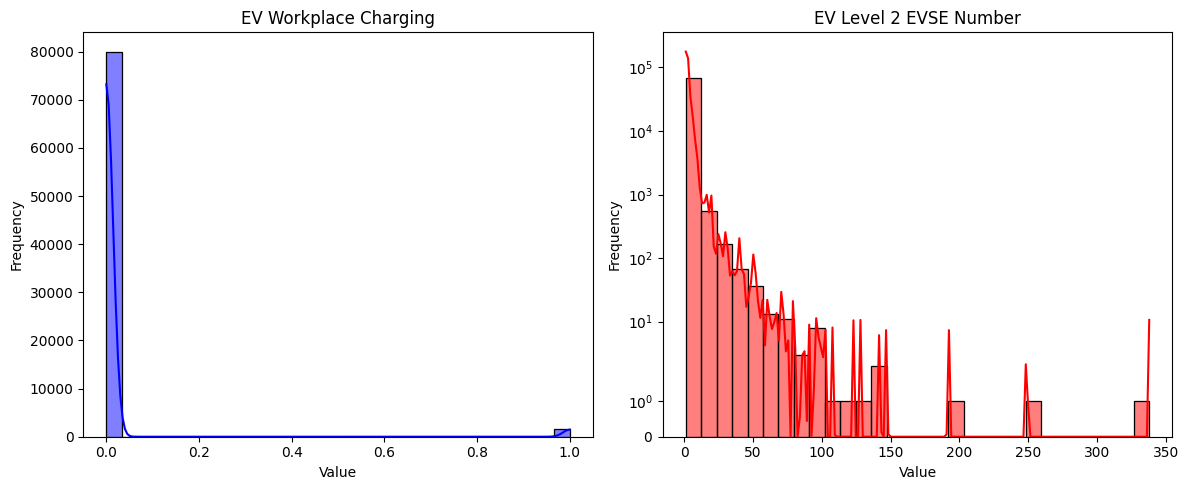

In [73]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first histogram
sns.histplot(Numericals["ev_workplace_charging"], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("EV Workplace Charging")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
plt.yscale("symlog")

# Plot the second histogram
sns.histplot(Numericals["ev_level2_evse_num"], bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title("EV Level 2 EVSE Number")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
plt.yscale("symlog")

plt.tight_layout()
plt.show()

##### Imputing ev_level2_evse_num with zeroes
- In this context, missing values are not due to data collection errors but rather signify that no Level 2 chargers exist at the station. Imputing with a mean or median would artificially inflate infrastructure data, leading to misleading insights. Assigning zero ensures data integrity by accurately reflecting station capabilities without introducing false assumptions.
##### Imputing ev_workplace_charging column with median
- Since the data is right-skewed, using the median is the best choice. Unlike the mean, which can be pulled up by a few stations with a high number of chargers, the median gives a more balanced and realistic estimate. This approach prevents overestimation, keeps the data representative, and maintains the true distribution of workplace chargers.

In [160]:
# Numerical["ev_workplace_charging"].fillna(Numerical["ev_workplace_charging"].median(), inplace=True)
#df['ev_levels_evse_num'] = df['ev_levels_evse_num'].fillna(0)

# Numerical.fillna({"ev_workplace_charging": Numerical["ev_workplace_charging"].median(),  
                 # "ev_level2_evse_num": 0}, inplace=True)

#### Categoricals

In [38]:
categoricals


,station_name,city,state,street_address,status_code,access_code,ev_connector_types,ev_network,access_days_time
125,LADWP - Truesdale Center,Sun Valley,CA,11797 Truesdale St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",SHELL_RECHARGE,Fleet use only
126,Los Angeles Convention Center,Los Angeles,CA,1201 S Figueroa St,E,public,"[""""J1772""""]",Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,Los Angeles,CA,111 N Hope St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,For fleet and employee use only
128,LADWP - Haynes Power Plant,Long Beach,CA,6801 E 2nd St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,Fleet use only
129,LADWP - Harbor Generating Station,Wilmington,CA,161 N Island Ave,E,private,"[""""J1772""""]",Non-Networked,Fleet use only
...,...,...,...,...,...,...,...,...,...
97877,SHOP CHARGING S SHOP 2,Lewisville,TX,1547 S Stemmons Fwy,E,public,"[""""J1772""""]",ChargePoint Network,24 hours daily
97878,Bay Point Rentals,Miami,FL,18412 Homestead Ave,E,public,"[""""J1772""""]",CHARGELAB,NaN
97879,"Out of Service - Energy Conservation & Supply,...",Brooklyn,NY,53 9th St,E,public,"[""""J1772""""]",CHARGELAB,NaN
97880,Out of Service - Dignity Moves,Alameda,CA,2350 5th St,E,public,"[""""J1772""""]",CHARGELAB,NaN


In [37]:
categoricals["access_days_time"].value_counts()

access_days_time
24 hours daily                                                                                                                                              60748
24 hours daily. Please check Tesla's online station map to see if an adapter is required at this location.                                                   2272
Mon 6:00am - 11:59pm; Tue 6:00am - 11:59pm; Wed 6:00am - 11:59pm; Thu 6:00am - 11:59pm; Fri 6:00am - 11:59pm; Sat 6:00am - 11:59pm; Sun 6:00am - 11:59pm     1436
Dealership business hours                                                                                                                                    1012
24 hours daily; for Rivian use only                                                                                                                           666
                                                                                                                                                            ...  
24 hours da

In [41]:
def categorize_24hrs(access_times):
    return access_times.apply(lambda x: "24hrs" if "24 hours" in str(x).lower() else x)

# Apply function to the column
categoricals["access_days_time"] = categorize_24hrs(df["access_days_time"])

In [42]:
categoricals["access_days_time"].value_counts

<bound method IndexOpsMixin.value_counts of 125                       Fleet use only
126                  5:30am-9pm; pay lot
127      For fleet and employee use only
128                       Fleet use only
129                       Fleet use only
                      ...               
97877                              24hrs
97878                                NaN
97879                                NaN
97880                                NaN
97881                                NaN
Name: access_days_time, Length: 81673, dtype: object>

In [43]:
def categorize_access_time(value):
    if pd.notnull(value) and '24 hours' in value.lower():
        return '24 hours daily'
    else:
        return 'Not 24 hours'

categoricals['access_days_time_category'] = categoricals['access_days_time'].apply(categorize_access_time)

# Displaying the first few rows to verify the new column
print(categoricals[['access_days_time', 'access_days_time_category']].head())

                    access_days_time access_days_time_category
125                   Fleet use only              Not 24 hours
126              5:30am-9pm; pay lot              Not 24 hours
127  For fleet and employee use only              Not 24 hours
128                   Fleet use only              Not 24 hours
129                   Fleet use only              Not 24 hours


In [44]:
import re
from datetime import datetime

def categorize_access_time_detailed(value):
    if pd.isnull(value) or value == 'Hours not specified':
        return 'Not Clear'
    
    # Check for explicit 24 hours mention
    if '24 hours' in value.lower():
        return '24 hours daily'
    
    # Try to extract time patterns
    time_pattern = r'(\d{1,2}(?::\d{2})?\s*(?:am|pm))\s*-\s*(\d{1,2}(?::\d{2})?\s*(?:am|pm))'
    matches = re.findall(time_pattern, value.lower())
    
    if matches:
        for start_time, end_time in matches:
            try:
                # Convert times to datetime for comparison
                start = datetime.strptime(start_time.strip(), '%I:%M%p' if ':' in start_time else '%I%p')
                end = datetime.strptime(end_time.strip(), '%I:%M%p' if ':' in end_time else '%I%p')
                
                # Calculate hours difference
                hours_diff = (end - start).seconds / 3600
                if hours_diff == 24 or 'daily' in value.lower():
                    return '24 hours daily'
                else:
                    return 'Not 24 hours'
            except ValueError:
                return 'Not Clear'
    
    return 'Not Clear'

# Apply the new categorization
df['access_time_detailed'] = df['access_days_time'].apply(categorize_access_time_detailed)

# Show distribution of categories
print("Distribution of access time categories:")
print(df['access_time_detailed'].value_counts())

# Show some examples
print("\
Sample categorizations:")
print(df[['access_days_time', 'access_time_detailed']].head(10))

Distribution of access time categories:
access_time_detailed
Not Clear         89537
Not 24 hours       6591
24 hours daily     1754
Name: count, dtype: int64
Sample categorizations:
                                    access_days_time access_time_detailed
0                                                NaN            Not Clear
1                                                NaN            Not Clear
2                                                NaN            Not Clear
3                                              24hrs            Not Clear
4                                              24hrs            Not Clear
5                                              24hrs            Not Clear
6                                              24hrs            Not Clear
7                                              24hrs            Not Clear
8  8am-6pm M-F; call 718-204-4048 to arrange for ...         Not 24 hours
9  8am-8pm M-F; call 718-204-4048 to arrange for ...         Not 24 hours


In [50]:
import re
import pandas as pd

def extract_operating_hours(access_string):
    """
    Extract the number of operating hours from parking access time strings.
   
    Parameters:
    access_string (str): String containing access time information
   
    Returns:
    float: Number of operating hours per day, or None if hours cannot be determined
    """
    # Convert to string and lowercase for consistent processing
    access_string = str(access_string).lower()
   
    # Case 1: 24 hours daily
    if '24 hours' in access_string:
        return 24.0
   
    # Case 2: Simple time range format (e.g., "5:30am-9pm")
    time_range_match = re.search(r'(\d{1,2}):?(\d{2})?(?:am|pm)?[-](\d{1,2}):?(\d{2})?(?:am|pm)', access_string)
    if time_range_match:
        # Extract start and end times
        def convert_to_24hr(hour, minute, is_pm):
            hour = int(hour)
            minute = int(minute) if minute else 0
            if is_pm and hour != 12:
                hour += 12
            elif not is_pm and hour == 12:
                hour = 0
            return hour + minute/60
       
        # Extract components
        start_hour = time_range_match.group(1)
        start_minute = time_range_match.group(2) or '00'
        end_hour = time_range_match.group(3)
        end_minute = time_range_match.group(4) or '00'
       
        # Determine AM/PM
        start_is_pm = 'pm' in access_string[time_range_match.start():time_range_match.end()].split('-')[0]
        end_is_pm = 'pm' in access_string[time_range_match.start():time_range_match.end()].split('-')[1]
       
        # Convert to 24-hour format
        start_time = convert_to_24hr(start_hour, start_minute, start_is_pm)
        end_time = convert_to_24hr(end_hour, end_minute, end_is_pm)
       
        # Calculate hours
        if end_time < start_time:  # Handles cases crossing midnight
            return 24 - (start_time - end_time)
        return end_time - start_time
   
    # Case 3: Business hours approximation
    if 'business hours' in access_string:
        return 9.0  # Assuming typical 8am-5pm business hours
   
    # Case 4: Specific format like "6am-12am daily"
    specific_time_match = re.search(r'(\d{1,2})(?::\d{2})?(?:am|pm)-(\d{1,2})(?::\d{2})?(?:am|pm)', access_string)
    if specific_time_match:
        start_time = specific_time_match.group(1)
        end_time = specific_time_match.group(2)
       
        # Convert to 24-hour format
        start_hour = int(start_time)
        end_hour = int(end_time)
       
        if 'pm' in access_string.split('-')[1] and end_hour != 12:
            end_hour += 12
        if 'am' in access_string.split('-')[0] and start_hour == 12:
            start_hour = 0
           
        if end_hour < start_hour:
            return 24 - (start_hour - end_hour)
        return end_hour - start_hour
   
    # Return None for cases where hours cannot be determined
    return None

# Function to process the entire DataFrame column
def process_access_hours(df):
    """
    Process the entire DataFrame column to extract operating hours.
   
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'access_days_time' column
   
    Returns:
    pandas.Series: Series containing extracted operating hours
    """
    return df['access_days_time'].apply(extract_operating_hours)

# Example usage:
hours = process_access_hours(Ev_df)
Ev_df['operating_hours'] = hours
Ev_df[:5]

C:\Users\Damaris\AppData\Local\Temp\ipykernel_10088\2344394380.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ev_df['operating_hours'] = hours


,station_name,latitude,longitude,city,state,restricted_access,ev_renewable_source,street_address,status_code,access_code,...,ev_level1_evse_num,intersection_directions,owner_type_code,ev_level2_evse_num,ev_network,ev_pricing,access_days_time,maximum_vehicle_class,facility_type,operating_hours
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,NaN,NaN,11797 Truesdale St,E,private,...,NaN,NaN,LG,57.0,SHELL_RECHARGE,NaN,Fleet use only,NaN,UTILITY,NaN
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,0.0,NaN,1201 S Figueroa St,E,public,...,NaN,West hall and South hall,P,7.0,Non-Networked,Free; parking fee,5:30am-9pm; pay lot,LD,PARKING_GARAGE,15.5
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,NaN,NaN,111 N Hope St,E,private,...,NaN,Across Hope,LG,338.0,Non-Networked,NaN,For fleet and employee use only,LD,UTILITY,NaN
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,NaN,NaN,6801 E 2nd St,E,private,...,NaN,NaN,LG,19.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY,NaN
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,NaN,NaN,161 N Island Ave,E,private,...,NaN,At B St,LG,10.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY,NaN


In [55]:
import re
import pandas as pd

def extract_operating_hours(access_string):
    """
    Extract the number of operating hours from parking access time strings.
    Takes the first time range if multiple are present.
    
    Parameters:
    access_string (str): String containing access time information
    
    Returns:
    float: Number of operating hours per day, or None if hours cannot be determined
    """
    # Convert to string and lowercase for consistent processing
    access_string = str(access_string).lower()
    
    # Take first time range if multiple exist (split by semicolon or similar)
    first_range = access_string.split(';')[0].split('and')[0].strip()
    
    # Case 1: 24 hours daily
    if '24 hours' in first_range:
        return 24.0
    
    # Case 2: Simple time range format (e.g., "5:30am-9pm")
    time_range_match = re.search(
        r'(\d{1,2}):?(\d{2})?(?:\s*)?(?:am|pm)?[-](\d{1,2}):?(\d{2})?(?:\s*)?(?:am|pm)',
        first_range
    )
    
    if time_range_match:
        def convert_to_24hr(hour, minute, is_pm):
            hour = int(hour)
            minute = int(minute) if minute else 0
            
            # Handle special cases for 12 AM/PM
            if is_pm and hour != 12:
                hour += 12
            elif not is_pm and hour == 12:
                hour = 0
                
            return hour + minute/60
        
        # Extract components
        start_hour = time_range_match.group(1)
        start_minute = time_range_match.group(2) or '00'
        end_hour = time_range_match.group(3)
        end_minute = time_range_match.group(4) or '00'
        
        # Get the full matched string and split it to determine AM/PM
        full_match = first_range[time_range_match.start():time_range_match.end()]
        start_part, end_part = full_match.split('-')
        
        # Determine AM/PM
        start_is_pm = 'pm' in start_part.lower()
        end_is_pm = 'pm' in end_part.lower()
        
        # Convert to 24-hour format
        start_time = convert_to_24hr(start_hour, start_minute, start_is_pm)
        end_time = convert_to_24hr(end_hour, end_minute, end_is_pm)
        
        # Calculate hours
        if end_time < start_time:  # Handles cases crossing midnight
            return 24 - (start_time - end_time)
        return end_time - start_time
    
    # Case 3: Business hours approximation
    if 'business hours' in first_range:
        return 9.0  # Assuming typical 8am-5pm business hours
    
    # Return None for cases where hours cannot be determined
    return None

def process_access_hours(df):
    """
    Process the entire DataFrame column to extract operating hours.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'access_days_time' column
    
    Returns:
    pandas.Series: Series containing extracted operating hours
    """
    return df['access_days_time'].apply(extract_operating_hours)

# Example usage:
# hours = process_access_hours(Ev_df)
categoricals['operating_hours'] = hours
print(categoricals[:40])

                                           station_name            city state  \
125                            LADWP - Truesdale Center      Sun Valley    CA   
126                       Los Angeles Convention Center     Los Angeles    CA   
127                       LADWP - John Ferraro Building     Los Angeles    CA   
128                          LADWP - Haynes Power Plant      Long Beach    CA   
129                   LADWP - Harbor Generating Station      Wilmington    CA   
130                                 LADWP - Sylmar West          Sylmar    CA   
131                           LADWP - EV Service Center     Los Angeles    CA   
132                              LADWP - Fairfax Center     Los Angeles    CA   
133                             LADWP - Palmetto Center     Los Angeles    CA   
136                              Scripps Green Hospital        La Jolla    CA   
137                                       Galpin Motors       Sepulveda    CA   
138                         

## EV Charging Station Data Dictionary  

### **Location Information**  
- **`station_name`**: The name of the EV charging station, typically identifying the location or brand.  
- **`latitude`**: The north-south geographic coordinate of the station (in degrees).  
- **`longitude`**: The east-west geographic coordinate of the station (in degrees).  
- **`city`**: The city where the EV charging station is located.  
- **`state`**: The state or region where the station is located (if applicable).  
- **`country`**: The country where the EV charging station is located.  
- **`street_address`**: The full street address, including building number and street name.  

### **Operational Status & Access**  
- **`status_code`**: Indicates the station’s current status (e.g., "Available," "Out of Service," "In Use").  
- **`access_code`**: A code or identifier required to access the charging station (e.g., PIN, card number).  

### **Charging Equipment & Capabilities**  
- **`ev_connector_types`**: The types of connectors available (e.g., Type 1, Type 2, CCS, CHAdeMO).  
- **`ev_dc_fast_num`**: The number of **DC fast chargers**, which provide rapid charging.  
- **`ev_level1_evse_num`**: The number of **Level 1 EVSE units**, which offer slow charging (typically for residential use).  
- **`ev_level2_evse_num`**: The number of **Level 2 EVSE units**, which offer faster charging and are commonly found in public networks.  

### **Network & Pricing**  
- **`ev_network`**: The name of the network operating the station (e.g., Tesla Supercharger, ChargePoint).  
- **`ev_pricing`**: Information on the station's cost structure (e.g., per-minute, per-kWh, or membership-based).  


In [ ]:
(Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False)

* Any column with more that 20% of missing value; should be dropped.
Rationale: the column, ev_level2_evse_num, is critical for our analysis, this the dropping threshold should cater to retain it.

In [ ]:
df_Filtered = Ev_df.drop(columns = ['ev_level1_evse_num', 'ev_dc_fast_num', 'ev_pricing'], axis = 1)
df_Filtered.head()

In [ ]:
df_Filtered['status_code'].nunique()

In [ ]:
df_Filtered['ev_network'].value_counts()[:10]

#### Considerations

* The USA dataset constitutes all states; *QUESTION* To ensure similarity to our Nairobi scenario, is it important that we consider maybe one major state, then a specific city? Maybe consider a city with the highest number of charging stations.

* How are we going to deal with the street addresses? we could not onehot encode all the 55896 unique instances.

Rationale:
Street addresses might not be particularly useful for clustering EV charging stations based on location, given that we have all the geographic coordinates provided( latitudes and longitudes). They provide a more precise and direct indication of the stations physical positions. Street addresses will add more complexity since they vary in format. The street address could only be helpful for field/ ground application where the predicted Ev station coordinate can be mapped to the nearest street (geocoding). The street addresses does not directly impact geographical Ev stations clustering when we already have the latitudes and longitudes.

* Station_ name
Drop this column. Rationale, station names are surface representations of Ev stations. The dataset has a total of 78629 different stations. Encoding these stations for the purpose of clustering will only increase sparsity of our data. Moreover, the stations are precisely represented by geographic cordinates. 


* City
There are 7206 different cities in the data set. In these cities, there are various charging stations referenced by geographic coordinates, station names and street addresses. Encoding this column would increase sparsity with minimal significance on the clustering accuracy.

* State.
There are 52 US states. Consideration on the effect of encoding this column and its influence on the cluster model. *QUESTION*; would the different states be good representations of different regions of Nairobi city. Better results can be achieved by filtering for a specific state, with highest value counts, and filter for specific cities, and map the Ev station to the clusters. State-level differences might capture regional variations, but these variations might be subtle compared to geographic coordinates.


* How to deal with the ev_connector_types; contains a list of various conncetors: 
*Opt to drop this row; Rationale, the project aim is to locate the best location for these connectors based on the geographic and other operational data. This column is not of much significance to our model.* Onehot encoding this feature would only increase more sparsity to our dataset, thus influencing the cluster algorithm.

* ev_level2_evse_num, drop this column. 
Rationale; this column is not relevant for our analysis since it only focus on the number of units at a charging station over the strategic position for the station.

* ev_network
Drop this column. Rationale; the ev_network reflects the suppliers or the managers of the charging stations.Encoding this column could only increase sparsity of the data with no significant adjustment to the accuracy of the cluster model.



###### NB, consider only the features that have significant influence on the locations of the Ev charging stations

* Label encode the rest the categoricals columns

In [ ]:
df_Filtered = df_Filtered[['latitude', 'longitude', 'city','status_code', 'access_code', 'ev_level2_evse_num']]
df_Filtered

In [ ]:
# Filter the data frame for the top ten cities with most Ev scharging stations
df_1 = df_Filtered[df_Filtered['city' ].isin(df_Filtered['city'].value_counts()[:10].keys())]
df_1

In [ ]:
df_1.isnull().sum()

* Imputing the ev_level2_evse_num, with 36%, would mean introduction of more bias and error to our model.  The missing entries for this column is reflective that the stations used either the ev_level2_evse_num or ev_level1_evse_num. Imputing these entries with either median or mean of the same column is not satisfactory. Impute with zero to imply the type of charging was not of ev_level2_evse_num. 

In [ ]:
# Check the duplicates
df_1.duplicated().sum()

In [ ]:
# Code to remove duplicates and keep the first.
df_1 = df_1.drop_duplicates()
df_1

In [ ]:
numericals = df_1.select_dtypes(include='number').columns
numericals

* Check at the distribution of the numerical columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_1["ev_level2_evse_num"], bins='auto', kde=True)
plt.title("Histogram of ev_level2_evse_num")
plt.xlabel("EV Level 2 EVSE Number")
plt.ylabel("Frequency")
plt.yscale('symlog')

plt.show()

In [ ]:
categoricals = df_1.select_dtypes(include='object').columns
categoricals

Preprocessing pipeline

In [ ]:
# Creating a pipeline
transformer = ColumnTransformer([
    ("cat",Pipeline([
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder())
        ]),categoricals),
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy='constant', fill_value = 0)),
        ("scaler",StandardScaler())
        ]),numericals)
])

In [ ]:
pipe = Pipeline([
    ("pre_pro",transformer),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

In [ ]:
# Train the model on the data set
pipe.fit(df_1)


In [ ]:
# Get the cluster labels for each data point
df_1['cluster'] = pipe.predict(df_1)

# Display the first few rows of the DataFrame with cluster labels
print(df_1.head(20))

In [ ]:
# Plot the clusters (latitude vs. longitude)
plt.scatter(df_1['latitude'], df_1['longitude'], c=df_1['cluster'], cmap='viridis')
plt.title("KMeans Clustering of EV Stations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Defining the number of clusters
n_clusters = 2 

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Training the model
y_kmeans = kmeans.fit_predict(X_tfidf)

## Print the cluster assignments for each document
print(f"Cluster Assignments: {y_kmeans}")

In [ ]:
# Step 3: Predict the cluster assignments for each document
predictions = kmeans.predict(X_tfidf)

# Print the predictions
print(f"Predicted Cluster Assignments: {predictions}")

### Nairobi OpenStreet Road Netowrk Data

In [ ]:
# Import OpenStreet Map
import osmnx as ox
# Import Geopandas for geospatial Information
import geopandas as gpd

# Define the target location
city = "Nairobi, Kenya"

# Fetch road network
G = ox.graph_from_place(city, network_type="drive")

# Convert to DataFrame
nodes, edges = ox.graph_to_gdfs(G)
#edges.to_csv("nairobi_roads.csv")
print("✅ Nairobi road data saved!")


In [ ]:
### Loading OpenStreet Nairobi Data

data = pd.read_csv('nairobi_roads.csv')

data.head()

This dataset describes Nairobi's road network, with relevant features such as:

* osmid (OpenStreetMap ID)
* highway (road type classification)
* length (road segment length)
* geometry (road segment coordinates)
* lanes (number of lanes)
* junction (whether it's a roundabout or intersection)
* maxspeed (speed limits)

### Tailoring U.S.A data for Kenya

Since the dataset originates from the US, we need to extract only relevant data that can be adapted to the Kenyan context.

1. Filter only EV-related data: Remove non-EV stations (e.g., CNG, LPG) and retain stations where fuel_type_code = EV.
2. Extract relevant columns: Focus on features that can be applied in Kenya, such as:
    * access_code (public/private)
    * ev_pricing_fr (if pricing models are useful)
    * x, y (longitude and latitude)
    * ev_network_ids_posts (charging infrastructure details)
3. Find similar land-use patterns in Kenya (e.g., CBD, highways, malls).
4. Use Nairobi road network data to determine high-traffic areas.
5. Compare US charging station clustering patterns to predict optimal locations in Nairobi.